In [52]:

# import key libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.simplefilter('ignore')
import re

In [268]:
!pip install translate

In [347]:
#! cd "C:\Users\jeanm\Anaconda3\envs\test\books\Repair_Cafe_Sept_2019"
# load the Repair_cafe data set into data_set_final database object
data_set_ORC = pd.ExcelFile(r"C:\Users\jeanm\Anaconda3\envs\test\books\Repair_Cafe_Sept_2019\data_set.xlsx")
data_set_final=data_set_ORC.parse("Sheet1")

In [348]:
# look at the data set
print(data_set_final.shape)
# remove the null items
data_set_final_2=data_set_final[data_set_final.iloc[:,1].isnull()!=True]
data_set_final_2.shape

(19095, 17)


(19049, 17)

In [349]:
# define the columns heads by the first line
data_set_header= data_set_final_2.columns
print(data_set_header)

Index(['Registration number', 'Kind of product', 'Category', 'Brand',
       'Build year (estimated)', 'Model, type or serial number',
       'Fault + probable cause', 'Defect found', 'Repaired: yes/half/no',
       'If yes: what did you do to repair it?',
       'If half: what did you do, which advice did you give?',
       'If no: why could you not repair it?',
       'Reparability score (1=difficult, 10=easy)',
       'Was repair information available?',
       'If yes: where did it come from, manufacturer or made by users?',
       'Source of repair information?', 'Hint'],
      dtype='object')


In [350]:
#general exploration
data_set_final_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19049 entries, 2 to 19094
Data columns (total 17 columns):
Registration number                                               19049 non-null object
Kind of product                                                   19049 non-null object
Category                                                          19049 non-null object
Brand                                                             19048 non-null object
Build year (estimated)                                            8929 non-null object
Model, type or serial number                                      1120 non-null object
Fault + probable cause                                            15191 non-null object
Defect found                                                      13993 non-null object
Repaired: yes/half/no                                             19047 non-null object
If yes: what did you do to repair it?                             10005 non-null object
If half: what

In [351]:
# we can see that there is lot of missing values of Build year, Model
# we can focus on the other columns

In [352]:
#exploration1: PRODUCT Kind of Product
data_set_final_2.groupby(by="Kind of product").count().iloc[:,0].sort_values(ascending = False).head(5)

Kind of product
Coffee maker      1535
Trousers/pants    1078
Bicycle           1046
Vacuum cleaner    1027
Lamp/lighting      902
Name: Registration number, dtype: int64

In [353]:
#there are 638 different kinds of products
# the 5 most repaired product Category are Coffee Maker, Trousers/pants, Bicycle, Vacuum cleaner and Lamp/lighting

In [354]:
# how to simplify this?
#step1 = lower case
data_set_final_2['new_kind_of_product']=[my_text.lower() for my_text in data_set_final_2['Kind of product']]
data_set_final_2['new_kind_of_product'].value_counts()

coffee maker      1535
trousers/pants    1078
bicycle           1046
vacuum cleaner    1027
lamp/lighting      902
                  ... 
desk stool           1
juice jug            1
jug                  1
color enlarger       1
spectacle case       1
Name: new_kind_of_product, Length: 638, dtype: int64

In [355]:
#exploration2: PRODUCT Category
data_set_final_2.groupby(by="Category").count().iloc[:,0].sort_values(ascending = False)

Category
Household appliances electric        7123
Textile                              2686
Display and sound equipment          2601
Other                                1743
Computers/phones                     1307
Bicycles                             1296
Tools electric                        895
Household appliances non-electric     532
Tools non-electric                    329
Toys electric                         235
Furniture                             197
Toys non-electric                     104
Category                                1
Name: Registration number, dtype: int64

In [356]:
# there are 10 categories of products
# the 5 most repaired ones are "Household appliances electric", "Textile", "Display and SOund Equipment", "Other", and "Computers/phones"

In [357]:
#exploration3: BRANDS
print(data_set_final_2.groupby(by="Brand").count().iloc[:,0].sort_values(ascending = False).size)
data_set_final_2.groupby(by="Brand").count().iloc[:,0].sort_values(ascending = False).head(6)

2003


Brand
Unknown/n.a.    7393
Philips         1962
Sony             363
Bosch            319
Tefal            265
Samsung          239
Name: Registration number, dtype: int64

In [358]:
# amongst the 2003 brands registered the 5 most repaired are Philips, Sony, Bosch Tefal and Samsung

In [359]:
type(data_set_final_2.iloc[1,1])

str

In [360]:
# how to simplify this?
#step1 = lower case => no effect
data_set_final_2['new_brand']=[my_text.lower() if (type(my_text) is str) ==True else my_text for my_text in data_set_final_2['Brand']]
data_set_final_2['new_brand'].value_counts()

unknown/n.a.        7393
philips             1962
sony                 363
bosch                319
tefal                265
                    ... 
azor                   1
labtec                 1
shimano                1
ibico                  1
matson/husqvarna       1
Name: new_brand, Length: 2003, dtype: int64

In [557]:
data_set_final_2[data_set_final_2['new_brand']=='samsung'].loc[:,'new_kind_of_product'].value_counts()

television                              50
tablet                                  36
smartphone                              28
printer                                 14
microwave                               14
vacuum cleaner                          11
telephone (not mobile or smartphone)     9
laptop                                   9
microwave oven                           6
display                                  5
dvd player/recorder                      5
video player/recorder                    4
blu ray player                           4
mobile phone (not smartphone)            4
photo camera                             3
remote control                           3
dvd/cd player                            3
cd player/recorder                       3
home cinema                              2
cd/dvd player                            2
tuner                                    2
dvd/video player                         2
charger (battery, power supply)          2
speaker    

In [361]:
# exploration4: REPAIR SUCCESS
data_set_final_2.groupby(by="Repaired: yes/half/no").count().iloc[:,0].sort_values(ascending=False)[0:3]/data_set_final_2.shape[0]*100

Repaired: yes/half/no
yes     64.712058
no      22.919838
half    12.347105
Name: Registration number, dtype: float64

In [177]:
#64% of all products have been considered as repaired, 23% have not been successfully repaired, 12% have been "half" repaired

In [362]:
# what are the brands with the highest repair success?
data_repair_success=data_set_final_2.groupby(by=["Brand","Repaired: yes/half/no"]).count().iloc[:,0].sort_values(ascending=False).reset_index()
data_repair_success=data_repair_success.pivot(values="Registration number", columns="Repaired: yes/half/no", index="Brand")
data_repair_success["total"]=data_repair_success.sum(axis=1)
data_repair_success = data_repair_success.sort_values(by = "total", ascending = False)
#we drop the data repaired was stated ja or Repaired
data_repair_success= data_repair_success.drop(columns = ["ja","Repaired"], axis=0)
# we compute the percent or repair
data_repair_success["percent repaired"]=data_repair_success["yes"]/data_repair_success["total"]*100
#we remove the brands with less than 10 products repaired
data_repair_success=data_repair_success[data_repair_success["total"]>50]
print(data_repair_success.shape)
# 10 brands the most repairable
data_repair_success_best=data_repair_success.sort_values(by=["percent repaired"], ascending=False)
print(data_repair_success_best)

(40, 5)
Repaired: yes/half/no   half      no     yes   total  percent repaired
Brand                                                                 
Batavus                  5.0     5.0    90.0   100.0         90.000000
Giant                    NaN     7.0    61.0    68.0         89.705882
Gazelle                  8.0    10.0   149.0   167.0         89.221557
Unknown/n.a.           585.0  1027.0  5780.0  7392.0         78.192641
Pfaff                    9.0     8.0    52.0    69.0         75.362319
Sparta                   4.0    10.0    42.0    56.0         75.000000
Singer                  14.0    17.0    77.0   108.0         71.296296
Bestron                  5.0    13.0    38.0    56.0         67.857143
Miele                   17.0    67.0   148.0   232.0         63.793103
Philips                231.0   555.0  1175.0  1961.0         59.918409
Hema                     5.0    18.0    34.0    57.0         59.649123
Princess                 8.0    31.0    57.0    96.0         59.37500

In [363]:
# what are the kind of products with the highest repair success?
data_repair_success_kop=data_set_final_2.groupby(by=["Kind of product","Repaired: yes/half/no"]).count().iloc[:,0].sort_values(ascending=False).reset_index()
data_repair_success_kop=data_repair_success_kop.pivot(values="Registration number", columns="Repaired: yes/half/no", index="Kind of product")
data_repair_success_kop["total"]=data_repair_success_kop.sum(axis=1)
data_repair_success_kop = data_repair_success_kop.sort_values(by = "total", ascending = False)
#we drop the data repaired was stated ja or Repaired
data_repair_success_kop= data_repair_success_kop.drop(columns = ["ja","Repaired"], axis=0)
# we compute the percent or repair
data_repair_success_kop["percent repaired"]=data_repair_success_kop["yes"]/data_repair_success_kop["total"]*100
#we remove the product types with less than 10 products repaired
data_repair_success_kop=data_repair_success_kop[data_repair_success_kop["total"]>100]
print(data_repair_success_kop.shape)
# product types per repair rate
data_repair_success_kop=data_repair_success_kop.sort_values(by=["percent repaired"], ascending=False)
print(data_repair_success_kop)

(42, 5)
Repaired: yes/half/no            half     no     yes   total  percent repaired
Kind of product                                                               
Knife/knives/scissors             3.0    2.0   269.0   274.0         98.175182
Shirt                             NaN    2.0   100.0   102.0         98.039216
Trousers/pants                   14.0   17.0  1047.0  1078.0         97.124304
Pruning shears / Garden shears    2.0    5.0   136.0   143.0         95.104895
Sweater                           2.0    2.0    97.0   102.0         95.098039
Blouse                            2.0    4.0   108.0   114.0         94.736842
Dress                             5.0    2.0   122.0   129.0         94.573643
Coat                             12.0   13.0   310.0   335.0         92.537313
Bicycle lighting                  3.0    6.0    92.0   101.0         91.089109
Bag                               5.0    7.0    99.0   111.0         89.189189
Bicycle                          47.0   78.0

In [364]:
# what are the product Category with the highest repair success?
data_repair_success_C=data_set_final_2.groupby(by=["Category","Repaired: yes/half/no"]).count().iloc[:,0].sort_values(ascending=False).reset_index()
data_repair_success_C=data_repair_success_C.pivot(values="Registration number", columns="Repaired: yes/half/no", index="Category")
data_repair_success_C["total"]=data_repair_success_C.sum(axis=1)
data_repair_success_C = data_repair_success_C.sort_values(by = "total", ascending = False)
#we drop the data repaired was stated ja or Repaired
data_repair_success_C= data_repair_success_C.drop(columns = ["ja","Repaired"], axis=0)
# we compute the percent or repair
data_repair_success_C["percent repaired"]=data_repair_success_C["yes"]/data_repair_success_C["total"]*100
print(data_repair_success_C.shape)
# sort by repair rate
data_repair_success_C=data_repair_success_C.sort_values(by=["percent repaired"], ascending=False)
print(data_repair_success_C)

(13, 5)
Repaired: yes/half/no               half      no     yes   total  \
Category                                                           
Textile                             61.0    75.0  2549.0  2686.0   
Tools non-electric                  14.0    16.0   299.0   329.0   
Bicycles                            65.0   107.0  1124.0  1296.0   
Household appliances non-electric   52.0    79.0   401.0   532.0   
Furniture                           30.0    21.0   146.0   197.0   
Other                              183.0   332.0  1227.0  1742.0   
Toys non-electric                   12.0    24.0    68.0   104.0   
Household appliances electric      928.0  2090.0  4105.0  7123.0   
Toys electric                       33.0    73.0   129.0   235.0   
Tools electric                     123.0   288.0   484.0   895.0   
Computers/phones                   352.0   353.0   602.0  1307.0   
Display and sound equipment        499.0   908.0  1193.0  2600.0   
Category                             NaN

In [29]:
# one can notice the impact of "being electric" on the reparability of a product category. 
# can this be linked to the age (i.e. non electric stuff are older...)

In [365]:
# Exploration5 : BUILD YEAR
data_set_final_2.dtypes
#Build year is an object type. Let's cast it to a float value
data_set_final_2.loc[:,"my_build_year"]=pd.to_numeric(data_set_final_2["Build year (estimated)"], errors='coerce')
#clean the "my_build_year" column by removing values out of 1800 - 2019, which represent 1 half of the values
data_set_final_2.loc[:,"my_build_year"]=[my_year if (my_year>1800 and my_year<2020) else np.nan for my_year in data_set_final_2["my_build_year"]]
#let's now explore the mean age of the categories
data_repair_success_C_Y=data_set_final_2.groupby(by=["Category"]).mean(numeric_only=True)
data_repair_success_C_Y.loc[:,"my_build_year"]=[my_year if np.isnan(my_year)==True else round(my_year,1) for my_year in data_repair_success_C_Y["my_build_year"]]
data_repair_success_C_Y

,my_build_year
Category,
Bicycles,2005.9
Category,NaN
Computers/phones,2010.4
Display and sound equipment,2001.3
Furniture,1993.1
Household appliances electric,2006.6
Household appliances non-electric,1994.0
Other,1999.2
Textile,2010.4


In [366]:
#let's group the 2 databases together into one
data_repair_success_C_final=pd.merge(data_repair_success_C,data_repair_success_C_Y, how="left", on="Category")
#we remove the useless last line
data_repair_success_C_final=data_repair_success_C_final.drop(['Category'])
data_repair_success_C_final

,half,no,yes,total,percent repaired,my_build_year
Category,,,,,,
Textile,61.0,75.0,2549.0,2686.0,94.899479,2010.4
Tools non-electric,14.0,16.0,299.0,329.0,90.881459,2001.8
Bicycles,65.0,107.0,1124.0,1296.0,86.728395,2005.9
Household appliances non-electric,52.0,79.0,401.0,532.0,75.375940,1994.0
Furniture,30.0,21.0,146.0,197.0,74.111675,1993.1
Other,183.0,332.0,1227.0,1742.0,70.436280,1999.2
Toys non-electric,12.0,24.0,68.0,104.0,65.384615,1994.9
Household appliances electric,928.0,2090.0,4105.0,7123.0,57.630212,2006.6
Toys electric,33.0,73.0,129.0,235.0,54.893617,2007.6


In [367]:
#let's improve the table with more features
# electric of not electric
data_repair_success_C_final.loc[:,"electric"]=["YES" if (" electric" in my_cat)==True else "NO" for my_cat in data_repair_success_C_final.index ]
data_repair_success_C_final.loc[data_repair_success_C_final.tail(2).index,"electric"]="YES"
data_repair_success_C_final=data_repair_success_C_final.sort_index(inplace=False)
data_repair_success_C_final

,half,no,yes,total,percent repaired,my_build_year,electric
Category,,,,,,,
Bicycles,65.0,107.0,1124.0,1296.0,86.728395,2005.9,NO
Computers/phones,352.0,353.0,602.0,1307.0,46.059679,2010.4,YES
Display and sound equipment,499.0,908.0,1193.0,2600.0,45.884615,2001.3,YES
Furniture,30.0,21.0,146.0,197.0,74.111675,1993.1,NO
Household appliances electric,928.0,2090.0,4105.0,7123.0,57.630212,2006.6,YES
Household appliances non-electric,52.0,79.0,401.0,532.0,75.375940,1994.0,NO
Other,183.0,332.0,1227.0,1742.0,70.436280,1999.2,NO
Textile,61.0,75.0,2549.0,2686.0,94.899479,2010.4,NO
Tools electric,123.0,288.0,484.0,895.0,54.078212,2005.6,YES


<function matplotlib.pyplot.show(*args, **kw)>

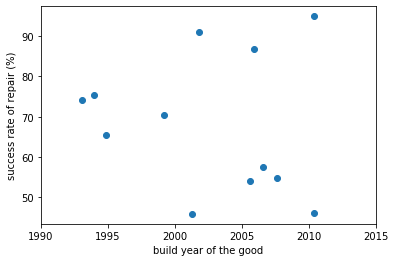

In [368]:
#let's plot everything

plt.scatter(data_repair_success_C_final["my_build_year"], data_repair_success_C_final["percent repaired"])
plt.xlabel("build year of the good")
plt.ylabel("success rate of repair (%)")
plt.xlim(1990, 2015)
plt.show

In [375]:
# explore reparability score
data_set_final_2.groupby(by='Reparability score (1=difficult, 10=easy)').count().iloc[:,0].sort_values(ascending = False)
#what is the mean reparability score per category ?
#first change the reparability score from object to an int value
data_set_final_2.loc[:,"my_reparability"]=pd.to_numeric(data_set_final_2.loc[:,"Reparability score (1=difficult, 10=easy)"], errors='coerce')
data_repar_year_C=data_set_final_2.groupby(by=['Kind of product']).mean().reset_index()
data_repar_year_C.sort_values(by='my_reparability', ascending=False)

,Kind of product,my_build_year,my_reparability
91,Card shuffler,NaN,10.0
71,Bread bin/drum/tin,NaN,10.0
319,Jug,NaN,10.0
505,Skeelers,2014.0,10.0
327,Keyring,2000.0,10.0
...,...,...,...
515,Soap dispenser,NaN,NaN
523,Spectacle case,NaN,NaN
544,Sundial,NaN,NaN
566,Theatre spot,NaN,NaN


In [369]:
# most of repairs are easy ones (7 to 10 reparability score)
# the mean reparability scores are lowest 6.3 (display and sound equipment), and highest 8.8 (tools non -electric)

In [376]:
#explore the other features - can they be used to improve the algo?
# we apply some easy NLP pipeline: to lower case, remove non letters
data_set_final_2.groupby(by='Fault + probable cause').count().iloc[:,-1].sort_values(ascending= False)[0:20]
data_set_final_2['new_Fault']=[my_text.lower() if (type(my_text) is str) ==True else my_text for my_text in data_set_final_2['Fault + probable cause']]
my_pattern=re.compile('[^A-Za-z?]+')
data_set_final_2['new_Fault']=[my_pattern.sub(' ',my_text) if (type(my_text) is str) ==True else my_text for my_text in data_set_final_2['new_Fault']]
dictionary_fault= data_set_final_2['new_Fault'].value_counts()
print(dictionary_fault.head(20))
print(dictionary_fault.head(20).sum())
#the issue is that after translation, this is not providing any insight on the type of failure (most of it is "does not work")



onbekend               691
doet het niet meer     376
doet het niet          301
slijtage               242
werkt niet             219
doet niets             133
doet niets meer        122
?                      117
te lang                113
bot                    100
blunt                   96
korter maken            89
kortsluiting            74
lekt                    71
lekke band              67
doet niks               64
gebruik                 60
not working             59
n v t                   59
niet van toepassing     58
Name: new_Fault, dtype: int64
3111


In [377]:
#explore the other features - can they be used to improve the algo?
# we apply some easy NLP pipeline: to lower case, remove non letters
data_set_final_2.groupby(by='Defect found').count().iloc[:,-1].sort_values(ascending= False)[0:20]
data_set_final_2['new_Defect']=[my_text.lower() if (type(my_text) is str) ==True else my_text for my_text in data_set_final_2['Defect found']]
my_pattern=re.compile('[^A-Za-z?]+')
data_set_final_2['new_Defect']=[my_pattern.sub(' ',my_text) if (type(my_text) is str) ==True else my_text for my_text in data_set_final_2['new_Defect']]
dictionary_defect= data_set_final_2['new_Defect'].value_counts()
print(dictionary_defect.head(20))
print(dictionary_defect.head(20).sum())

#the issue is that after translation, this is not providing any insight on the type of failure (most of it is "does not work")

doet het niet         285
werkt niet            207
te lang               159
bot                   157
geen                  120
onbekend              119
idem                  114
defect                113
doet niets            112
doet het niet meer    107
doet niets meer        82
vuil                   74
draadbreuk             72
schakelaar defect      64
lekke band             60
schakelaar             59
wordt niet warm        47
slijtage               42
rits kapot             41
naad los               40
Name: new_Defect, dtype: int64
2074


In [378]:
#we save the postprocessed dataset
data_set_final_2.to_csv('./Repair_cafe_processed_dataset_Nov19')

In [379]:
pd.read_csv('./Repair_cafe_processed_dataset_Nov19',index_col=0)

,Registration number,Kind of product,Category,Brand,Build year (estimated),"Model, type or serial number",Fault + probable cause,Defect found,Repaired: yes/half/no,If yes: what did you do to repair it?,...,Was repair information available?,"If yes: where did it come from, manufacturer or made by users?",Source of repair information?,Hint,new_kind_of_product,new_brand,my_build_year,new_Fault,new_Defect,my_reparability
2,0031_2019_0831_046,Laminator,Other,Onbekend,2000,NaN,Werkt miet,NaN,yes,Gesoldeerd,...,NaN,NaN,NaN,NaN,laminator,onbekend,2000.0,werkt miet,NaN,8.0
3,0031_2019_0831_045,Rice cooker,Household appliances electric,Russell Hobbs,2000,NaN,Geen stroom,NaN,yes,Smeltveiligheid vervangen,...,NaN,NaN,NaN,NaN,rice cooker,russell hobbs,2000.0,geen stroom,NaN,NaN
4,0031_2019_0831_044,Drilling machine,Tools electric,Black & Decker,2010,NaN,Stopt tijdens het draaien,NaN,yes,Instructies opvolgen van bediening,...,NaN,NaN,NaN,NaN,drilling machine,black & decker,2010.0,stopt tijdens het draaien,NaN,7.0
5,0031_2019_0831_043,Vacuum cleaner,Household appliances electric,AEG,2013,NaN,Zuigt niet meer,NaN,half,NaN,...,NaN,NaN,NaN,NaN,vacuum cleaner,aeg,2013.0,zuigt niet meer,NaN,8.0
6,0031_2019_0831_042,Other,Display and sound equipment,IKEGAMI,1989,NaN,Knoppen zijn kapot nadat hij van de tafel is g...,NaN,no,NaN,...,NaN,NaN,NaN,NaN,other,ikegami,1989.0,knoppen zijn kapot nadat hij van de tafel is g...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19090,0044_2018_0929_003,Bracelet,Other,Unknown/n.a.,NaN,wooden bracelet,Bracelet came apart,Crack along the grain,yes,Glued the crack together,...,unknown,NaN,NaN,NaN,bracelet,unknown/n.a.,NaN,bracelet came apart,crack along the grain,3.0
19091,0044_2018_0929_002,Turntable,Display and sound equipment,Sears,1965,Model 6273,Platter speed problem,Dried up mechanism,half,NaN,...,no,NaN,NaN,NaN,turntable,sears,1965.0,platter speed problem,dried up mechanism,4.0
19092,0044_2018_0929_001,Radio,Display and sound equipment,General Electric,1980,7-4115B,AM-FM switch intermittant,Bad contact,yes,Used contact cleaner,...,unknown,NaN,NaN,Very often the fix is simply cleaning,radio,general electric,1980.0,am fm switch intermittant,bad contact,5.0
19093,0039_2018_0430_002,Lamp/lighting,Household appliances electric,Unknown/n.a.,NaN,NaN,age,broken socket,yes,NaN,...,NaN,NaN,NaN,NaN,lamp/lighting,unknown/n.a.,NaN,age,broken socket,NaN


In [380]:
# creating a machine learning algorithm to predict the repair rate of a machine ?
# think about the structure and the features to use
# existing features to use would be repar_score<my_build year<Brand<KindofProduct<Category put in the proper format. We drop the other columns
data_set_final_ML=data_set_final_2.drop(columns=['Registration number', 'Model, type or serial number', 'Fault + probable cause', 'Defect found'])
data_set_final_ML=data_set_final_ML.drop(columns=['If yes: what did you do to repair it?','If half: what did you do, which advice did you give?', 'If no: why could you not repair it?' ])
data_set_final_ML=data_set_final_ML.drop(columns=['Was repair information available?','If yes: where did it come from, manufacturer or made by users?','Source of repair information?','Hint'])
data_set_final_ML=data_set_final_ML.drop(columns=['Build year (estimated)','Reparability score (1=difficult, 10=easy)'])

# methodology to fill the NaN should be considered
data_set_final_ML.isna().sum()
# we drop the few lines of "brand" and "Repaired" where there are so few 
data_set_final_ML=data_set_final_ML.dropna(subset=['Brand', 'Repaired: yes/half/no'])
print(data_set_final_ML.isna().sum())

# we fill the my_reparability and the my_build_year with the median values per category
my_build_year_median=round(data_set_final_ML.groupby(by="Kind of product").mean().loc[:,'my_build_year'],0).reset_index()
my_reparability_median=round(data_set_final_ML.groupby(by="Kind of product").mean().loc[:,'my_reparability'],0).reset_index()
data_set_final_ML=data_set_final_ML.reset_index()
count_na_mbd=0
count_na_mrs=0
                                                  
for i in range(data_set_final_ML.shape[0]):
    if np.isnan(data_set_final_ML.loc[i,"my_build_year"])==True:
        for j in range (my_build_year_median.shape[0]):
            if data_set_final_ML.loc[i,"Kind of product"] == my_build_year_median.loc[j, "Kind of product"]:
                data_set_final_ML.loc[i,"my_build_year"]=my_build_year_median.loc[j, "my_build_year"]
                count_na_mbd+=1
 
for i in range(data_set_final_ML.shape[0]):
    if np.isnan(data_set_final_ML.loc[i,"my_reparability"])==True:
        for j in range (my_reparability_median.shape[0]):
            if data_set_final_ML.loc[i,"Kind of product"] == my_reparability_median.loc[j, "Kind of product"]:
                data_set_final_ML.loc[i,"my_reparability"]=my_reparability_median.loc[j, "my_reparability"]
                count_na_mrs+=1

print(data_set_final_ML.isna().sum())
print(count_na_mbd,count_na_mrs)



Kind of product              0
Category                     0
Brand                        0
Repaired: yes/half/no        0
new_kind_of_product          0
new_brand                    0
my_build_year            10416
new_Fault                 3855
new_Defect                5055
my_reparability           3726
dtype: int64
index                       0
Kind of product             0
Category                    0
Brand                       0
Repaired: yes/half/no       0
new_kind_of_product         0
new_brand                   0
my_build_year             338
new_Fault                3855
new_Defect               5055
my_reparability            35
dtype: int64
10416 3726


In [381]:
#we replace the remaining values by the mean values of my_build_year and my_reparability
values={"my_build_year":np.mean(data_set_final_ML.loc[:,"my_build_year"]),"my_reparability":np.mean(data_set_final_ML.loc[:,"my_reparability"])}
data_set_final_ML.fillna(value=values)

data_set_final_ML=data_set_final_ML.dropna(subset=['my_build_year', 'my_reparability'])
print(data_set_final_ML.isna().sum())

index                       0
Kind of product             0
Category                    0
Brand                       0
Repaired: yes/half/no       0
new_kind_of_product         0
new_brand                   0
my_build_year               0
new_Fault                3746
new_Defect               4946
my_reparability             0
dtype: int64


In [382]:
# we remove the textile, Furniture and Other categories which are out of scope
data_set_final_ML = data_set_final_ML.drop(data_set_final_ML[data_set_final_ML['Category'] =="Textile"].index)
data_set_final_ML = data_set_final_ML.drop(data_set_final_ML[data_set_final_ML['Category'] =="Other"].index)
data_set_final_ML = data_set_final_ML.drop(data_set_final_ML[data_set_final_ML['Category'] =="Furniture"].index)
data_set_final_ML.shape

(14263, 11)

In [383]:
# we explore the size of class observations category/kind of product / brand
data_set_final_ML.groupby(by=['Category','Kind of product', 'Brand']).count().iloc[:,-1].sort_values(ascending=False).head(10)

#we create a counter to get the size of observations associated to each one and so be able to remove the less frequent
#we create a dumb column for class
data_set_final_ML["my_dumb_column"]=data_set_final_ML["Category"]+data_set_final_ML["Kind of product"]+data_set_final_ML["Brand"]
my_counts=data_set_final_ML["my_dumb_column"].value_counts()
#we set a threshold
threshold = 2
data_set_final_ML_good= data_set_final_ML[~data_set_final_ML['my_dumb_column'].isin(my_counts[my_counts < threshold].index)]
data_set_final_ML_good=data_set_final_ML_good.drop(columns="my_dumb_column")
data_set_final_ML_good.shape

#we keep 9547 observations for a threshold of 5
# we keep 11566 observations for a threshold of 2

(11566, 11)

In [182]:
# we are now good to start the ML model build


In [384]:
# we decide to simplify the output by only have 2 categories: repaired = yes or not repaired = no
data_set_final_ML_good["Repaired: yes/half/no"]=["YES" if my_repair == "yes" else "NO" for my_repair in data_set_final_ML_good["Repaired: yes/half/no"] ]


In [385]:
# we create new features: Electric = Yes or No based on product category first
data_set_final_ML_good["Electric"]=["YES" if my_category in ['Computers/phones','Display and sound equipment','Household appliances electric','Tools electric','Toys electric'] else "NO" for my_category in data_set_final_ML_good["Category"]]
data_set_final_ML_good.shape

(11566, 12)

In [386]:
# we create an age category feature 
data_set_final_ML_good["age"]=2019-data_set_final_ML_good["my_build_year"]
data_set_final_ML_good["age_cat"]=["fresh" if my_age<2 else "ado" if my_age<5 and my_age>=2 else "mure" if my_age<10 and my_age>=5 else "old" if my_age<15 and my_age>=10 else "very_old" for my_age in data_set_final_ML_good["age"]]
data_set_final_ML_good.shape

(11566, 14)

In [387]:
#We import the appropriate packages
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import confusion_matrix
from sklearn import linear_model

SEED=222

In [388]:
# we can create labels for the categorical variables
data_set_final_ML_good.Category=pd.Categorical(data_set_final_ML_good.Category)
data_set_final_ML_good["Category_label"]=data_set_final_ML_good.Category.cat.codes
data_set_final_ML_good["Kind of product"]=pd.Categorical(data_set_final_ML_good["Kind of product"])
data_set_final_ML_good["Kindofproduct_label"]=data_set_final_ML_good["Kind of product"].cat.codes
data_set_final_ML_good["Brand"]=pd.Categorical(data_set_final_ML_good["Brand"])
data_set_final_ML_good["Brand_label"]=data_set_final_ML_good["Brand"].cat.codes
data_set_final_ML_good["Repaired: yes/half/no"]=pd.Categorical(data_set_final_ML_good["Repaired: yes/half/no"])
data_set_final_ML_good["Repaired_label"]=data_set_final_ML_good["Repaired: yes/half/no"].cat.codes
data_set_final_ML_good["Electric"]=pd.Categorical(data_set_final_ML_good["Electric"])
data_set_final_ML_good["Electric_label"]=data_set_final_ML_good["Electric"].cat.codes
data_set_final_ML_good["my_reparability"]=pd.Categorical(data_set_final_ML_good["my_reparability"])
data_set_final_ML_good["my_repar_label"]=data_set_final_ML_good["my_reparability"].cat.codes
data_set_final_ML_good["age_cat"]=pd.Categorical(data_set_final_ML_good["age_cat"])
data_set_final_ML_good["age_cat_label"]=data_set_final_ML_good["age_cat"].cat.codes

data_set_final_ML_good.head(10)


,index,Kind of product,Category,Brand,Repaired: yes/half/no,new_kind_of_product,new_brand,my_build_year,new_Fault,new_Defect,...,Electric,age,age_cat,Category_label,Kindofproduct_label,Brand_label,Repaired_label,Electric_label,my_repar_label,age_cat_label
2,4,Drilling machine,Tools electric,Black & Decker,YES,drilling machine,black & decker,2010.0,stopt tijdens het draaien,NaN,...,YES,9.0,mure,5,80,46,1,1,7,2
3,5,Vacuum cleaner,Household appliances electric,AEG,NO,vacuum cleaner,aeg,2013.0,zuigt niet meer,NaN,...,YES,6.0,mure,3,241,0,0,1,8,2
7,9,Vacuum cleaner,Household appliances electric,Dyson,YES,vacuum cleaner,dyson,2017.0,geeft geen contact,NaN,...,YES,2.0,ado,3,241,98,1,1,8,0
8,10,Other,Household appliances electric,Onbekend,YES,other,onbekend,2016.0,stekker aanzetten,NaN,...,YES,3.0,ado,3,166,251,1,1,8,0
9,11,Other,Household appliances electric,Onbekend,NO,other,onbekend,2016.0,werkt niet,NaN,...,YES,3.0,ado,3,166,251,0,1,4,0
10,12,Drilling machine,Tools electric,Bosch,NO,drilling machine,bosch,2016.0,komt rook uit,NaN,...,YES,3.0,ado,5,80,51,0,1,8,0
11,13,Other,Display and sound equipment,Sony,YES,other,sony,2000.0,printor,NaN,...,YES,19.0,very_old,2,166,324,1,1,8,4
12,14,Vacuum cleaner,Household appliances electric,AEG Electrolux,YES,vacuum cleaner,aeg electrolux,2009.0,hield er plots mee op ws snoerbreuk,NaN,...,YES,10.0,old,3,241,1,1,1,8,3
19,21,Vacuum cleaner,Household appliances electric,Miele,NO,vacuum cleaner,miele,2000.0,doet niets meer,NaN,...,YES,19.0,very_old,3,241,226,0,1,7,4
20,22,Microwave,Household appliances electric,Severin,NO,microwave,severin,2018.0,doet niets en is z g a n,NaN,...,YES,1.0,fresh,3,157,312,0,1,8,1


In [389]:
# we create a combined feature which kind of product x age using the labels
data_set_final_ML_good.loc[:,"comb_kop_age"]=(data_set_final_ML_good.Kindofproduct_label+1)*(data_set_final_ML_good.age_cat_label+1)
data_set_final_ML_good.loc[:,"comb_cat_age"]=(data_set_final_ML_good.Category_label+1)*(data_set_final_ML_good.age_cat_label+1)
data_set_final_ML_good.loc[:,"comb_brand_age"]=(data_set_final_ML_good.Brand_label+1)*(data_set_final_ML_good.age_cat_label+1)
data_set_final_ML_good.head(10)

,index,Kind of product,Category,Brand,Repaired: yes/half/no,new_kind_of_product,new_brand,my_build_year,new_Fault,new_Defect,...,Category_label,Kindofproduct_label,Brand_label,Repaired_label,Electric_label,my_repar_label,age_cat_label,comb_kop_age,comb_cat_age,comb_brand_age
2,4,Drilling machine,Tools electric,Black & Decker,YES,drilling machine,black & decker,2010.0,stopt tijdens het draaien,NaN,...,5,80,46,1,1,7,2,243,18,141
3,5,Vacuum cleaner,Household appliances electric,AEG,NO,vacuum cleaner,aeg,2013.0,zuigt niet meer,NaN,...,3,241,0,0,1,8,2,726,12,3
7,9,Vacuum cleaner,Household appliances electric,Dyson,YES,vacuum cleaner,dyson,2017.0,geeft geen contact,NaN,...,3,241,98,1,1,8,0,242,4,99
8,10,Other,Household appliances electric,Onbekend,YES,other,onbekend,2016.0,stekker aanzetten,NaN,...,3,166,251,1,1,8,0,167,4,252
9,11,Other,Household appliances electric,Onbekend,NO,other,onbekend,2016.0,werkt niet,NaN,...,3,166,251,0,1,4,0,167,4,252
10,12,Drilling machine,Tools electric,Bosch,NO,drilling machine,bosch,2016.0,komt rook uit,NaN,...,5,80,51,0,1,8,0,81,6,52
11,13,Other,Display and sound equipment,Sony,YES,other,sony,2000.0,printor,NaN,...,2,166,324,1,1,8,4,835,15,1625
12,14,Vacuum cleaner,Household appliances electric,AEG Electrolux,YES,vacuum cleaner,aeg electrolux,2009.0,hield er plots mee op ws snoerbreuk,NaN,...,3,241,1,1,1,8,3,968,16,8
19,21,Vacuum cleaner,Household appliances electric,Miele,NO,vacuum cleaner,miele,2000.0,doet niets meer,NaN,...,3,241,226,0,1,7,4,1210,20,1135
20,22,Microwave,Household appliances electric,Severin,NO,microwave,severin,2018.0,doet niets en is z g a n,NaN,...,3,157,312,0,1,8,1,316,8,626


In [390]:
#check of the datatypes
data_set_final_ML_good.dtypes

index                       int64
Kind of product          category
Category                 category
Brand                    category
Repaired: yes/half/no    category
new_kind_of_product        object
new_brand                  object
my_build_year             float64
new_Fault                  object
new_Defect                 object
my_reparability          category
Electric                 category
age                       float64
age_cat                  category
Category_label               int8
Kindofproduct_label         int16
Brand_label                 int16
Repaired_label               int8
Electric_label               int8
my_repar_label               int8
age_cat_label                int8
comb_kop_age                int16
comb_cat_age                 int8
comb_brand_age              int16
dtype: object

In [391]:
#check of the repaired_label
data_set_final_ML_good.groupby(by="Repaired_label").count().iloc[:,-1]/data_set_final_ML_good.shape[0]
#59% repaired, 41% not repaired

Repaired_label
0    0.410081
1    0.589919
Name: comb_brand_age, dtype: float64

In [392]:
# we drop the first not cat columns
data_set_final_ML_good_2=data_set_final_ML_good.drop(columns=["index","Kind of product","Category","Brand","Electric", "age", "age_cat","my_reparability",'new_kind_of_product','new_brand','new_Defect','new_Fault'])

data_set_final_ML_good_2.dtypes

Repaired: yes/half/no    category
my_build_year             float64
Category_label               int8
Kindofproduct_label         int16
Brand_label                 int16
Repaired_label               int8
Electric_label               int8
my_repar_label               int8
age_cat_label                int8
comb_kop_age                int16
comb_cat_age                 int8
comb_brand_age              int16
dtype: object

In [393]:
# we add more features that count the occurence of the categorical variables (to differentiate rare and frequent features)
#in both test and train datasets
for i in data_set_final_ML_good_2.columns:
    counts = data_set_final_ML_good_2.loc[:,i].value_counts().to_dict()
    data_set_final_ML_good_2[''+i+'_counts'] = data_set_final_ML_good_2.loc[:,i].map(counts)

In [468]:
data_set_final_ML_good_2.dtypes

Repaired: yes/half/no           category
my_build_year                    float64
Category_label                      int8
Kindofproduct_label                int16
Brand_label                        int16
Repaired_label                      int8
Electric_label                      int8
my_repar_label                      int8
age_cat_label                       int8
comb_kop_age                       int16
comb_cat_age                        int8
comb_brand_age                     int16
Repaired: yes/half/no_counts    category
my_build_year_counts               int64
Category_label_counts              int64
Kindofproduct_label_counts         int64
Brand_label_counts                 int64
Repaired_label_counts              int64
Electric_label_counts              int64
my_repar_label_counts              int64
age_cat_label_counts               int64
comb_kop_age_counts                int64
comb_cat_age_counts                int64
comb_brand_age_counts              int64
dtype: object

In [395]:
#let's build the train and test dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
train_good=data_set_final_ML_good_2
X=train_good.drop(['Repaired: yes/half/no','Repaired_label','Repaired: yes/half/no_counts','Repaired_label_counts'],axis=1)
scaler = MinMaxScaler()
X_scale=scaler.fit_transform(X.values)
#print(X.columns)
print(X_scale.shape)
Y=le.fit_transform(train_good['Repaired_label'])
print(Y.shape)
X_train,X_test,y_train,y_test=train_test_split(X_scale,Y,test_size=0.2,random_state=2010)
print(X_train.shape, X_test.shape,y_train.shape,y_test.shape)
print(y_test.dtype)

(11566, 20)
(11566,)
(9252, 20) (2314, 20) (9252,) (2314,)
int64


In [396]:
#let's try to do it with multiclass logistic regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))


0.7156290531776913
0.7100259291270528


In [397]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

gb = GradientBoostingClassifier(n_estimators=25, random_state=2018)
rf = RandomForestClassifier(n_estimators=10, max_depth=5,min_samples_split=2,random_state=2012)
knn = KNeighborsClassifier(n_neighbors=20,weights='distance')
nn = MLPClassifier((50,50,50),early_stopping=False, max_iter=200, random_state=2010, solver="lbfgs")
svc=LinearSVC(penalty='l2', dual=False, max_iter=10000, tol=0.001, C=0.1)
nb=MultinomialNB()

Results = pd.DataFrame({'Model': [],'Accuracy Score': []})

gb.fit(X_train, y_train)
Y_pred= gb.predict(X_test)
res = pd.DataFrame({"Model":['GradientBoostingClassifier'],
                    "Accuracy Score": [accuracy_score(Y_pred,y_test)]})
Results = Results.append(res)

rf.fit(X_train, y_train)
Y_pred= rf.predict(X_test)
res = pd.DataFrame({"Model":['RandomForestClassifier'],
                    "Accuracy Score": [accuracy_score(Y_pred,y_test)]})
Results = Results.append(res)

knn.fit(X_train, y_train)
Y_pred= knn.predict(X_test)
res = pd.DataFrame({"Model":['KNeighborsClassifier'],
                    "Accuracy Score": [accuracy_score(Y_pred,y_test)]})
Results = Results.append(res)

nn.fit(X_train, y_train)
Y_pred= nn.predict(X_test)
res = pd.DataFrame({"Model":['NeuralNetwork'],
                    "Accuracy Score": [accuracy_score(Y_pred,y_test)]})
Results = Results.append(res)

svc.fit(X_train, y_train)
Y_pred= svc.predict(X_test)
res = pd.DataFrame({"Model":['LinearSVC'],
                    "Accuracy Score": [accuracy_score(Y_pred,y_test)]})
Results = Results.append(res)

nb.fit(X_train, y_train)
Y_pred= nb.predict(X_test)
res = pd.DataFrame({"Model":['MultinomialNB'],
                    "Accuracy Score": [accuracy_score(Y_pred,y_test)]})
Results = Results.append(res)

Results

,Model,Accuracy Score
0,GradientBoostingClassifier,0.719101
0,RandomForestClassifier,0.711755
0,KNeighborsClassifier,0.679343
0,NeuralNetwork,0.702247
0,LinearSVC,0.710458
0,MultinomialNB,0.632239


<function matplotlib.pyplot.show(*args, **kw)>

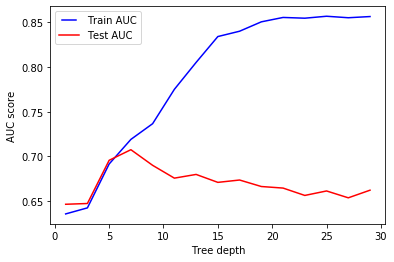

In [197]:
#depths exploration of the random forrest classifier
max_depths = np.arange(1,30,2)
train_results = []
test_results = []
for max_depth in max_depths:
   rf_opt = RandomForestClassifier(n_estimators=5, max_depth=max_depth, n_jobs=-1, min_samples_split=2,random_state=2018)
   rf_opt.fit(X_train, y_train)
   train_pred = rf_opt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred, pos_label=1)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf_opt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred, pos_label=1)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_depths, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

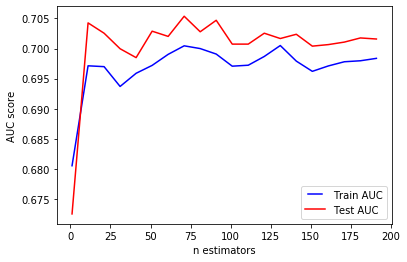

In [198]:
max_estimators = np.arange(1, 200,10)
train_results = []
test_results = []
for max_estim in max_estimators:
   rf_opt = RandomForestClassifier(n_estimators=max_estim, max_depth=5, n_jobs=-1,min_samples_split=2,random_state=2018)
   rf_opt.fit(X_train, y_train)
   train_pred = rf_opt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred, pos_label=1)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf_opt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred, pos_label=1)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_estimators, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_estimators, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n estimators')
plt.show

In [398]:
#where do the bad prediction lay?
data_set_final_ML_good["predicted"]=gb.predict(X_scale).astype('int8')

data_set_final_ML_good["good_prediction_status"]=["good" if int(data_set_final_ML_good.iloc[i,data_set_final_ML_good.columns.get_loc("Repaired_label")])==int(data_set_final_ML_good.iloc[i,data_set_final_ML_good.columns.get_loc("predicted")]) else "bad" for i in range(data_set_final_ML_good_2.shape[0])]
#data_set_final_ML_good[data_set_final_ML_good["good_prediction_status"]=="bad"].tail(20)
#print(data_set_final_ML_good.groupby(by="good_prediction_status").count().iloc[:,0])
data_set_final_ML_good.head(5)
print(data_set_final_ML_good['good_prediction_status'].value_counts())
print(data_set_final_ML_good[data_set_final_ML_good["predicted"]==0].groupby(by="Category").count().iloc[:,-1])
print(data_set_final_ML_good[data_set_final_ML_good["predicted"]==0].shape)

good    8323
bad     3243
Name: good_prediction_status, dtype: int64
Category
Bicycles                               39
Computers/phones                      564
Display and sound equipment          1045
Household appliances electric        1734
Household appliances non-electric      27
Tools electric                        217
Tools non-electric                      2
Toys electric                          62
Toys non-electric                       8
Name: good_prediction_status, dtype: int64
(3698, 26)


In [201]:
#the model is OK for start

In [399]:
data_set_ML_predict_success = data_set_final_ML_good.groupby(by=["Kind of product","good_prediction_status"]).count().reset_index()
data_set_ML_predict_success=data_set_ML_predict_success.pivot(values = "Category", columns="good_prediction_status", index="Kind of product")
data_set_ML_predict_success.loc[:,"pc_good"]=round(data_set_ML_predict_success["good"]/(data_set_ML_predict_success["bad"]+data_set_ML_predict_success["good"])*100,1)
data_set_ML_predict_success.sort_values(by="pc_good", ascending= False)
#print(data_set_ML_predict_success)

data_repair_success_C_2=data_set_final_ML_good.groupby(by=["Kind of product","Repaired: yes/half/no"]).count().reset_index()
data_repair_success_C_2=data_repair_success_C_2.pivot(values="Category", columns="Repaired: yes/half/no", index="Kind of product")
#print(data_repair_success_C_2)
#data_repair_success_C_2=data_repair_success_C_2.columns.add_categories(['pc_can_be_repaired'])
#data_repair_success_C_2.loc[:,"pc_can_be_repaired"]=round((data_repair_success_C_2["YES"])/(data_repair_success_C_2["YES"]+data_repair_success_C_2["NO"])*100,1)

data_repair_success_C_final=data_set_ML_predict_success.join(data_repair_success_C_2, how='left')
data_repair_success_C_final.loc[:,"pc_can_be_repaired"]=round((data_repair_success_C_final["YES"])/(data_repair_success_C_final["YES"]+data_repair_success_C_final["NO"])*100,1)
data_repair_success_C_final.sort_values(by='pc_good', ascending=False).head(50)

,bad,good,pc_good,NO,YES,pc_can_be_repaired
Kind of product,,,,,,
Knife/knives/scissors,3.0,179.0,98.4,3.0,179.0,98.4
Pruning shears / Garden shears,3.0,116.0,97.5,4.0,115.0,96.6
Coffee grinder,1.0,26.0,96.3,6.0,21.0,77.8
Shovel,1.0,13.0,92.9,1.0,13.0,92.9
Bicycle tyre,2.0,23.0,92.0,3.0,22.0,88.0
Bicycle lighting,7.0,78.0,91.8,8.0,77.0,90.6
Extension cord,1.0,11.0,91.7,NaN,12.0,NaN
Blu Ray Player,1.0,9.0,90.0,5.0,5.0,50.0
Waffle iron,1.0,9.0,90.0,7.0,3.0,30.0


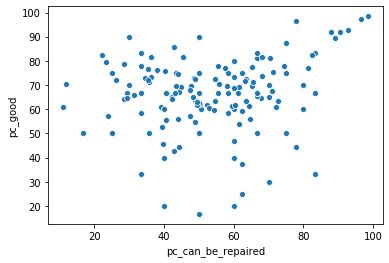

In [400]:
sns.scatterplot(x="pc_can_be_repaired",y="pc_good", data=data_repair_success_C_final)

In [215]:
# first: the model absolutely does not work: it predicts "can be repared" 99% of the time
# needs improvements! => needs more features to differentiate a reparable observation from a non reparable observation
#feature engineering performed
## add counts as labels to the train dataset - DONE with little improvement
## add data by setting threshold to 10 - DONE with no impact
## improve the (na) values replacement of my_reparability my_build_year by the mean of the "Kind of product" - DONE with little positive impact
## remove the "Furniture" category - DONE with little positive impact
## add a combined age_cat*category_label feature - DONE with little positive impact
## add a combined age_cat*kindofproduct_label feature - DONE with little positive impact
##MAJOR NOTE: we try different algorithm types to predict the reparability:

In [ ]:
# the algo granularity is mostly on "kind of product". It predicts always reparable or never reparable function of this
# with the reparability score it works much better

In [558]:
# application of the algorithm to new inputs
def extract_info_machine(my_machine, my_brand,my_age):
    my_useful_dataset=data_set_final_ML_good
    my_dataset=my_useful_dataset[my_useful_dataset['new_kind_of_product']==my_machine]
    my_dataset=my_dataset[my_dataset['new_brand']==my_brand]
    if my_dataset.shape[0]!=0:
        my_number_of_machine_brand=my_dataset.shape[0]
        my_reparibility_mean_of_machine_brand=round(my_dataset['my_reparability'].astype('int').mean(),1)
        my_percent_of_repair=round(my_dataset['Repaired: yes/half/no'].value_counts().iloc[0]/my_number_of_machine_brand,2)
        my_age_mean_of_machine_brand=round(my_dataset['age'].median(),1)
       
        #build of the vector for the prediction
        my_X=my_dataset.iloc[0,:]
        my_X_2=my_X.drop(labels=["index","Kind of product","Category","Brand","Electric", "age", "age_cat","my_reparability",'new_kind_of_product','new_brand','new_Defect','new_Fault'])
        my_X_3=my_X_2.drop(labels=['Repaired: yes/half/no','Repaired_label'])
        my_X_3['my_repar_label']=round(my_reparibility_mean_of_machine_brand,0)
        my_X_3['age_cat_label']=(0 if my_age<2 else 1 if my_age<5 and my_age>=2 else 2 if my_age<10 and my_age>=5 else 3 if my_age<15 and my_age>=10 else 4)
        my_X_3["comb_kop_age"]=(my_X_3.Kindofproduct_label+1)*(my_X_3.age_cat_label+1)
        my_X_3["comb_cat_age"]=(my_X_3.Category_label+1)*(my_X_3.age_cat_label+1)
        my_X_3["comb_brand_age"]=(my_X_3.Brand_label+1)*(my_X_3.age_cat_label+1)
        my_X_3['my_build_year']=2020-my_age
        my_X_3=my_X_3.drop(labels=['predicted','good_prediction_status'])

        for my_col_name in my_X_3.index:
            try: 
                my_X_3[my_col_name+'_counts']=data_set_final_ML_good_2[data_set_final_ML_good_2[my_col_name]==my_X_3[my_col_name]].iloc[0,data_set_final_ML_good_2.columns.get_loc(my_col_name+'_counts')]
            except:
                my_X_3[my_col_name+'_counts']=0

        my_X_3=pd.DataFrame([my_X_3])
        my_X_3_scale=scaler.transform(my_X_3.values)
        my_predict=('YES' if gb.predict(my_X_3_scale).astype('int8').item(0) ==1 else "NO")
        print('%.0f failed %s of %s brand have been received, with a mean age of %.1f years.' %(my_number_of_machine_brand,my_machine,my_brand,my_age_mean_of_machine_brand))
        print('%.1f percent have been succesfully repaired with a mean reparability index (from 1:hard to 10: easy) of %.1f' %(my_percent_of_repair*100,my_reparibility_mean_of_machine_brand))
        print('could your %.0f years old %s be repaired? Prediction is %s'%(my_age, my_machine, my_predict))
    return my_number_of_machine_brand,my_age_mean_of_machine_brand, my_reparibility_mean_of_machine_brand, my_percent_of_repair,my_predict


In [559]:
extract_info_machine('cd player/recorder','sony',10)

36 failed cd player/recorder of sony brand have been received, with a mean age of 17.0 years.
53.0 percent have been succesfully repaired with a mean reparability index (from 1:hard to 10: easy) of 6.7
could your 10 years old cd player/recorder be repaired? Prediction is NO


(36, 17.0, 6.7, 0.53, 'NO')

In [560]:
extract_info_machine('coffee maker','nespresso',6)

136 failed coffee maker of nespresso brand have been received, with a mean age of 9.0 years.
58.0 percent have been succesfully repaired with a mean reparability index (from 1:hard to 10: easy) of 6.4
could your 6 years old coffee maker be repaired? Prediction is YES


(136, 9.0, 6.4, 0.58, 'YES')

In [561]:
extract_info_machine('coffee maker','delonghi',6)

73 failed coffee maker of delonghi brand have been received, with a mean age of 9.0 years.
56.0 percent have been succesfully repaired with a mean reparability index (from 1:hard to 10: easy) of 6.1
could your 6 years old coffee maker be repaired? Prediction is YES


(73, 9.0, 6.1, 0.56, 'YES')

In [562]:
extract_info_machine('coffee maker','krups',6)

92 failed coffee maker of krups brand have been received, with a mean age of 9.0 years.
53.0 percent have been succesfully repaired with a mean reparability index (from 1:hard to 10: easy) of 6.1
could your 6 years old coffee maker be repaired? Prediction is YES


(92, 9.0, 6.1, 0.53, 'YES')

In [563]:
extract_info_machine('coffee maker','philips ',20)

729 failed coffee maker of philips  brand have been received, with a mean age of 9.0 years.
69.0 percent have been succesfully repaired with a mean reparability index (from 1:hard to 10: easy) of 6.6
could your 20 years old coffee maker be repaired? Prediction is YES


(729, 9.0, 6.6, 0.69, 'YES')